<a href="https://colab.research.google.com/github/Icemagic33/pytorch1/blob/main/PyTorch_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# we would like to generate 20 data points
N = 20

# random data on the x-axis in (-5, +5)
X = np.random.random(N)*10 - 5

# a line plus some noise
Y = 0.5 * X - 1 + np.random.randn(N) # true slope is 0.5 and true y-intercept is -1

# you'll have to take my "in-depth" series to understand
# why this is the CORRECT model to use our MSE loss

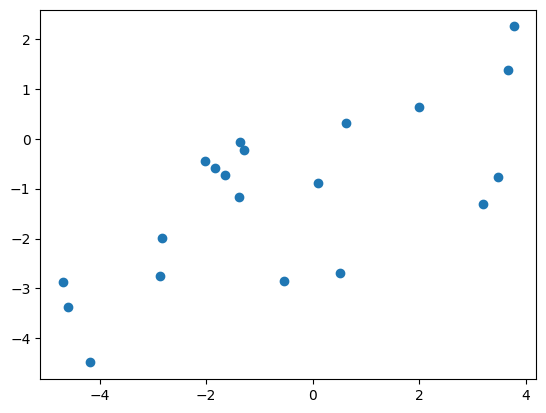

In [3]:
# Plot the data
plt.scatter(X, Y);

In [4]:
# Create the linear regression model
model = nn.Linear(1,1)

In [6]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [7]:
# In ML we want our data to be of shape: (num_samples x num_dimensions)
X = X.reshape(N, 1)
Y = Y.reshape(N, 1)

# PyTorch uses float32 by default
# Numpy creates float64 by default
inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

In [8]:
type(inputs)

torch.Tensor

In [ ]:
# Train the model